# NR 20MHz 64QAM PDSCH Signal
Simple implementation of NR20M 256QAM PDSCH with DMRS, following MATLAB reference implementation.

Key parameters:
- Bandwidth: 20 MHz
- Numerology: 1 (30 kHz SCS)
- PRBs: 51
- Modulation: 64QAM
- DMRS: Type A, symbols 2 and 11 in each slot


In [1]:
import pyPhyNR as pynr
from pyPhyNR.core.signal_builder import NRSignalBuilder

In [6]:
# Create signal builder for 20MHz, numerology 1 (30kHz SCS)
signal = NRSignalBuilder(bandwidth_mhz=20, numerology=1, cell_id=1)  # Using same cell_id as MATLAB example

# Configure carrier
signal.configure_carrier(
    sample_rate=30.72e6,
    fft_size=1024
).initialize_grid()

# Print carrier configuration
print("Carrier Configuration:")
print(signal.get_carrier_config())


Carrier Configuration:
{'bandwidth_mhz': 20, 'numerology': 1, 'sample_rate': 30720000.0, 'fft_size': 1024, 'num_rb': 51, 'cp_type': 'normal'}


In [7]:
signal.add_pdsch(
        start_rb=0,
        num_rb=51,  # Full bandwidth
        start_symbol=0,
        num_symbols=14,  # Full slot
        slot_pattern=list(range(20)),
        modulation="QAM64",
        power=0.0
    )

In [8]:
signal.add_dmrs(
    dmrs_positions=[2, 11],
    clear_full_symbol=False,
    subcarrier_pattern="even"
)



Plotting resource grid...


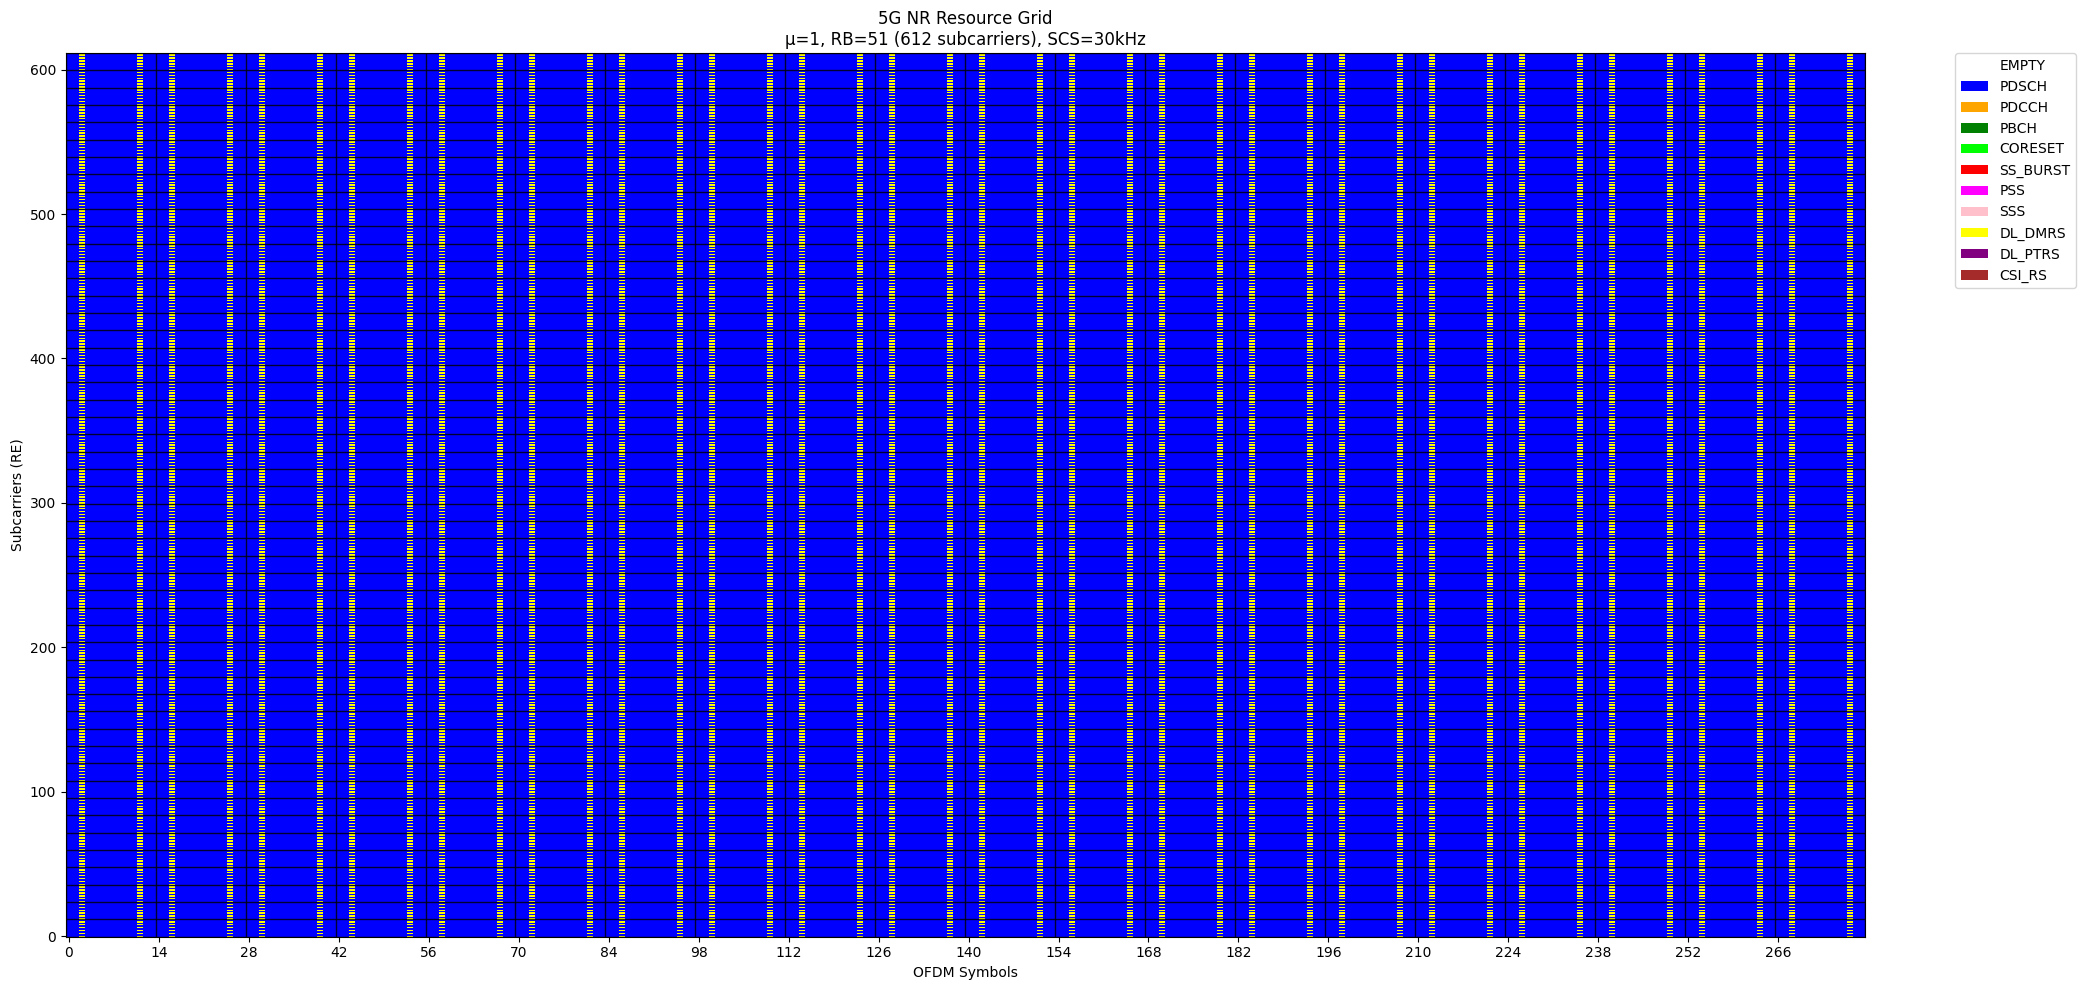


Generating waveform...

Plotting signal analysis...


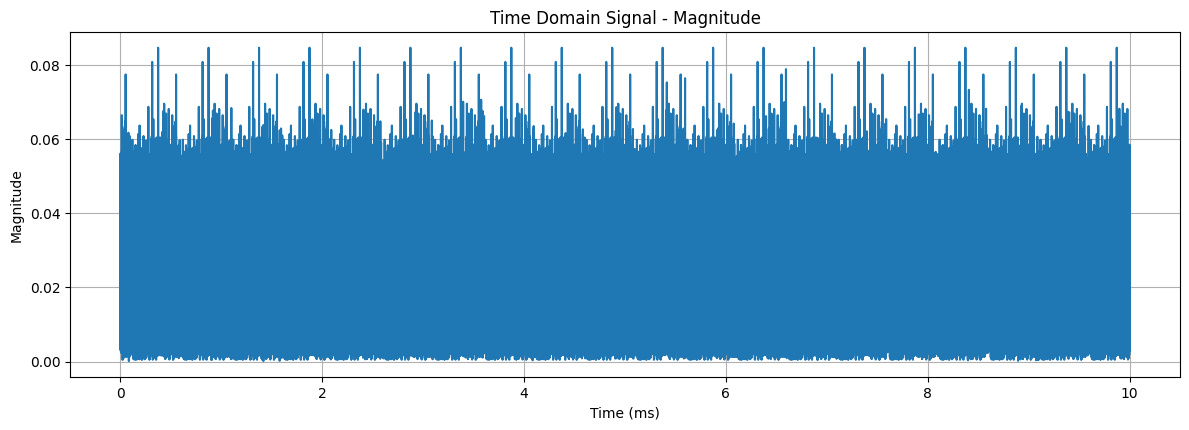

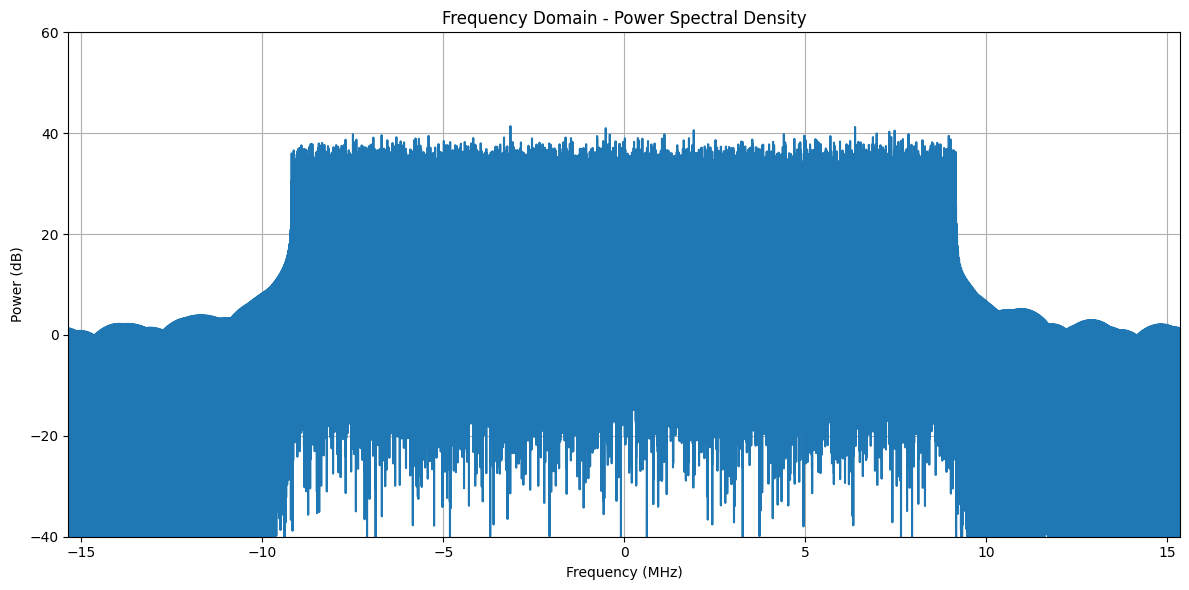

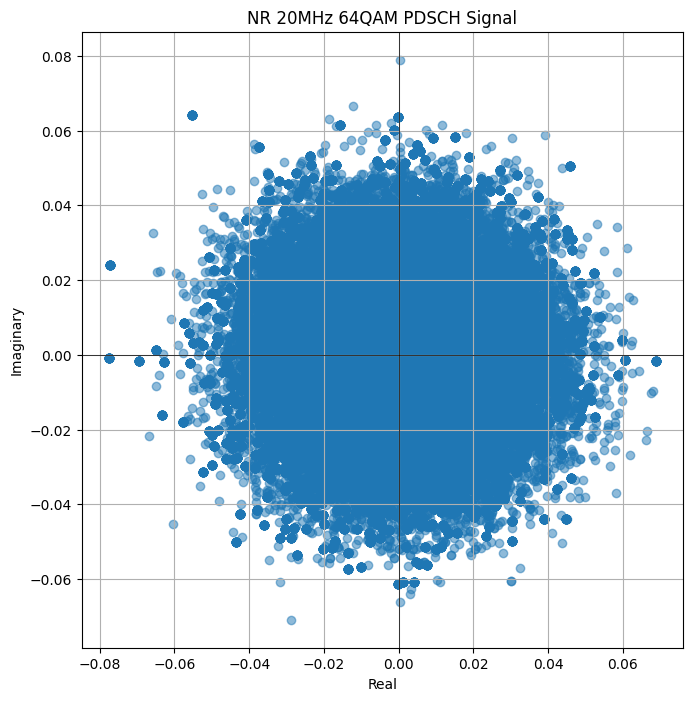

307200


In [9]:
# Visualize resource grid
print("\nPlotting resource grid...")
pynr.utils.plot_grid_dl(signal.carrier_config, signal.grid)

# Generate waveform
print("\nGenerating waveform...")
iq_samples = signal.generate_signal()

# Plot time and frequency domain
print("\nPlotting signal analysis...")
pynr.utils.plot_time_domain(iq_samples, signal.carrier_config)
pynr.utils.plot_frequency_domain(iq_samples, signal.carrier_config)
pynr.utils.plot_constellation(iq_samples, title="NR 20MHz 64QAM PDSCH Signal")
print(len(iq_samples))
